In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.metrics import plot_roc_curve, confusion_matrix, mean_squared_error
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay

The data set contains nine cellular indicators of breast cancer for 683 patients.


1. Patient id number
2. Clump Thickness (1-10)
3. Uniformity of Cell Size (1-10)
4. Uniformity of Cell Shape (1-10)
5. Marginal Adhesion (1-10)
6. Single Epithelial Cell Size (1-10)
7. Bare Nuclei (1-10)
8. Bland Chromatin (1-10)
9. Normal Nucleoli (1-10)
10. Mitoses (1-10)
11. Class: (2 for benign, 4 for malignant)

In [22]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data",
                  header=None,
                  na_values="?")
data.columns = ['patient_id','thickness','size_uniformity','shape_uniformity','adhesion','cell_size','bare_nuclei',
               'chromatin','nucleoli','mitosis','cancer']
data = data.dropna().astype(int)
data

,patient_id,thickness,size_uniformity,shape_uniformity,adhesion,cell_size,bare_nuclei,chromatin,nucleoli,mitosis,cancer
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


## Scatter Plot Analysis

Let's see if we can see any obvious correlations between the features.

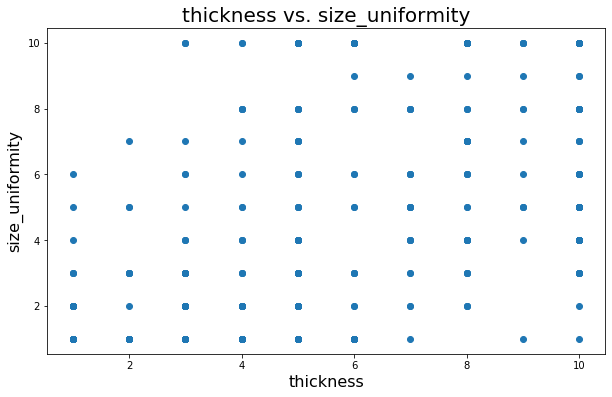

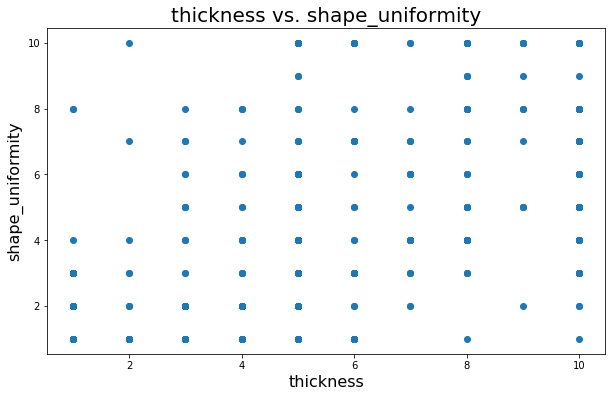

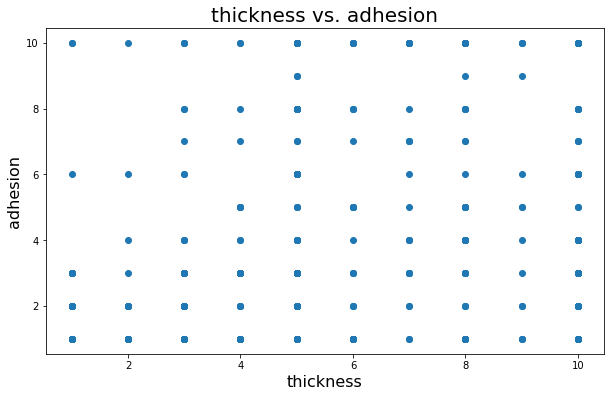

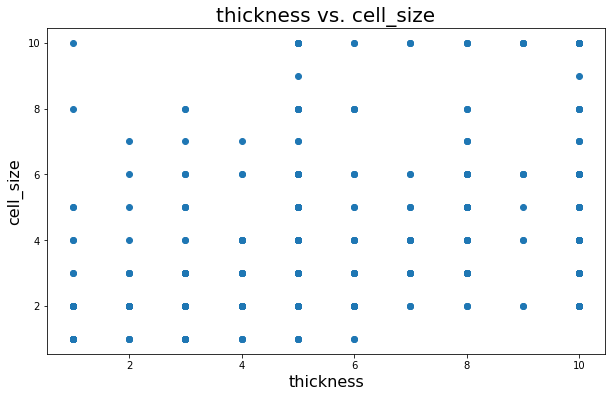

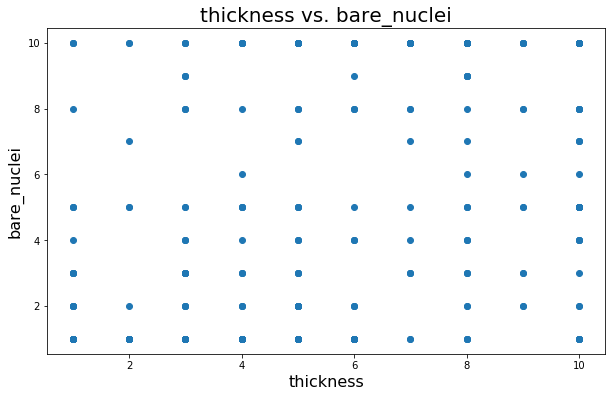

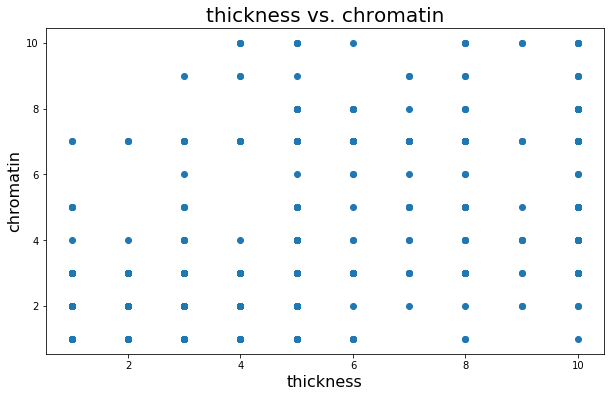

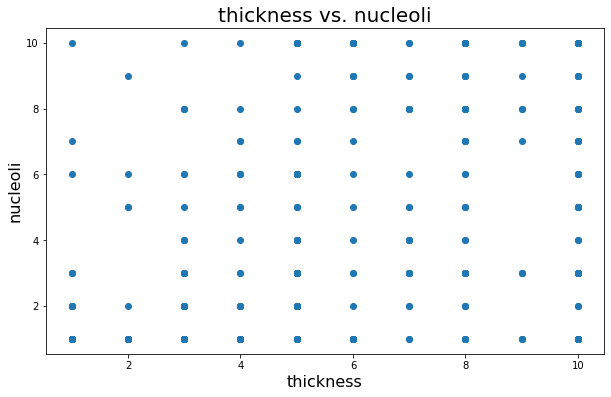

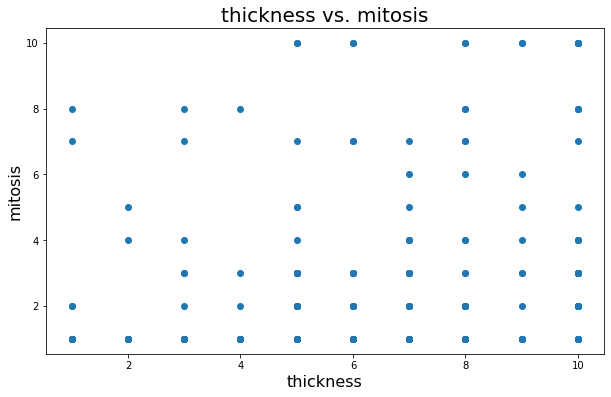

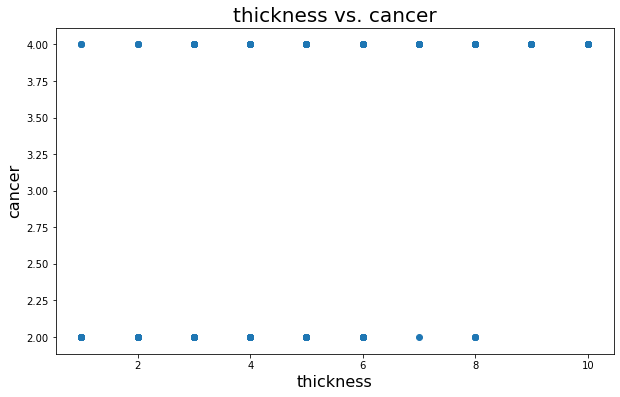

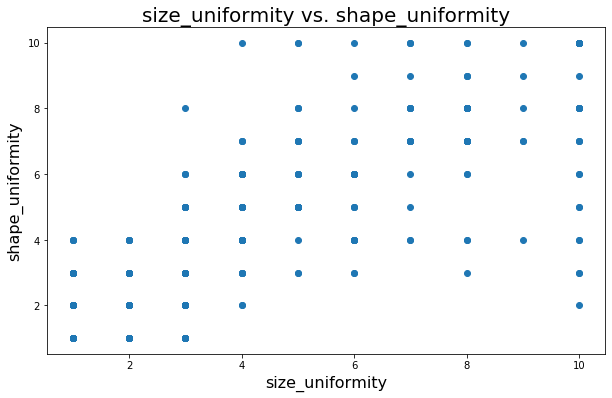

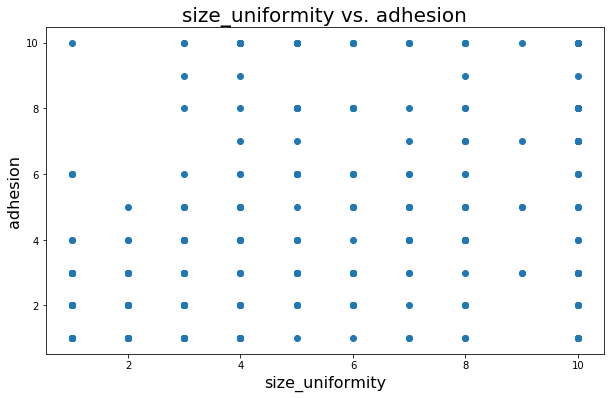

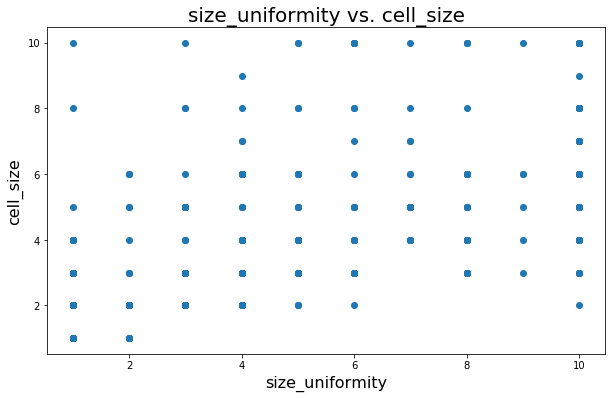

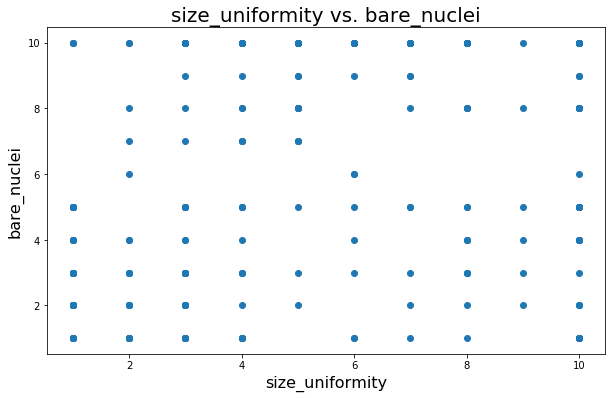

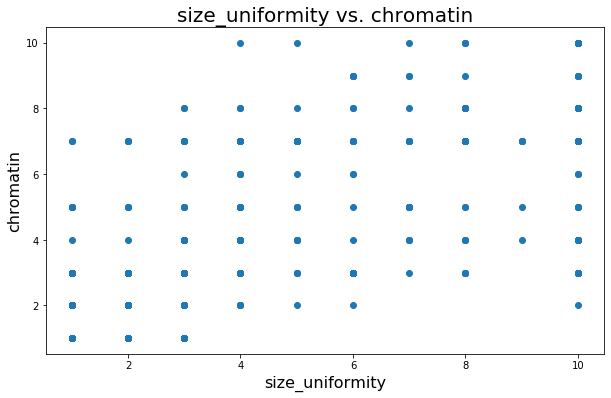

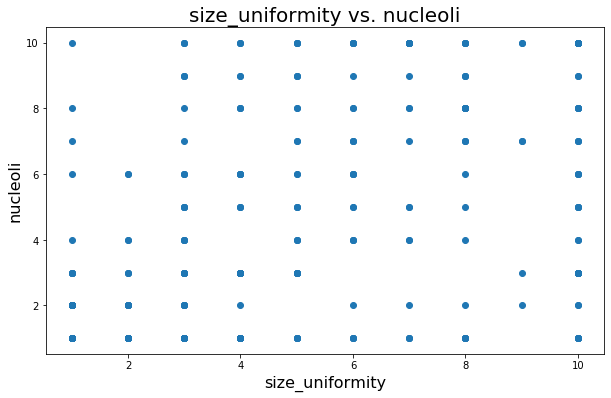

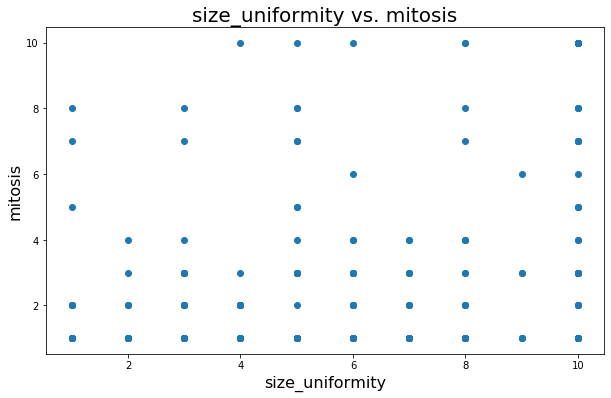

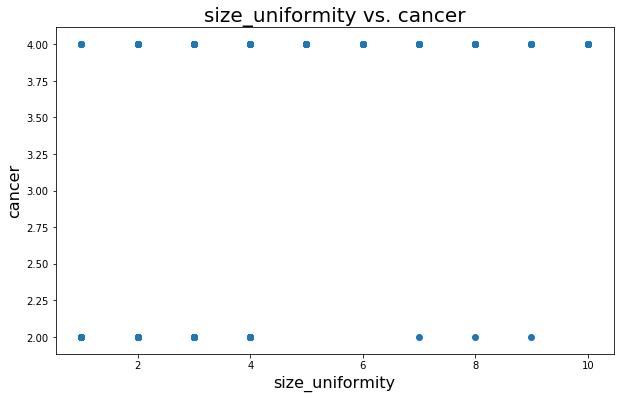

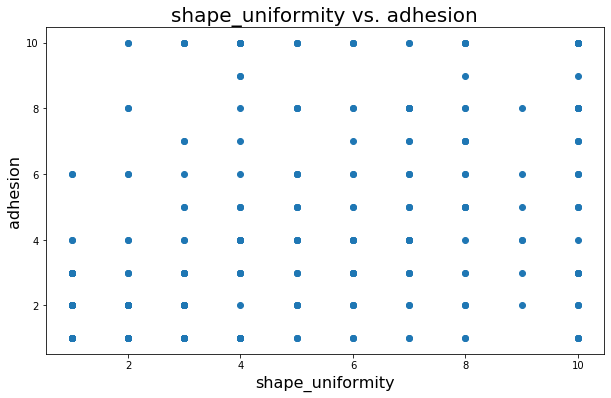

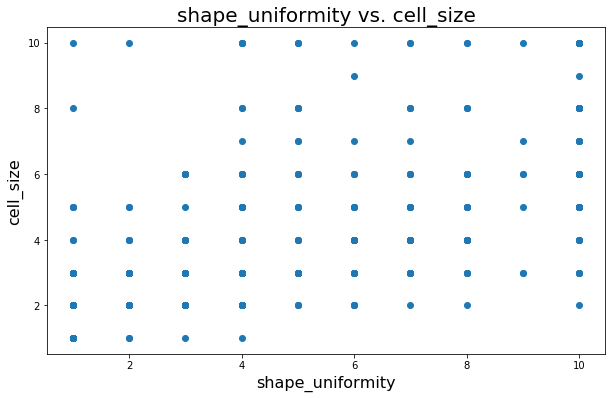

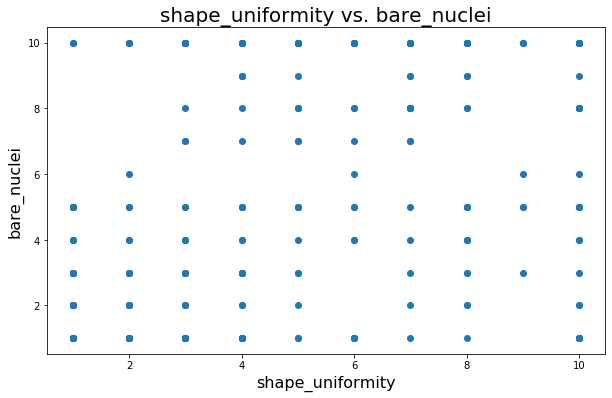

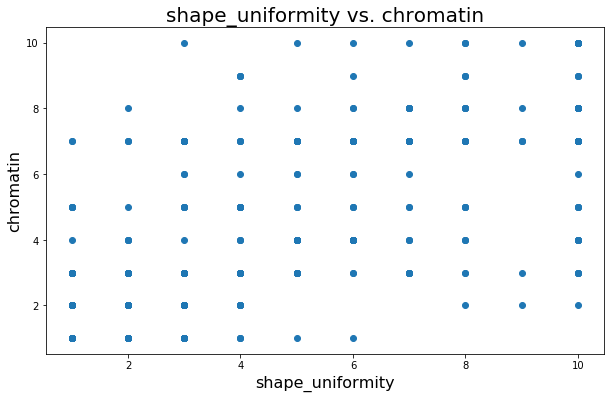

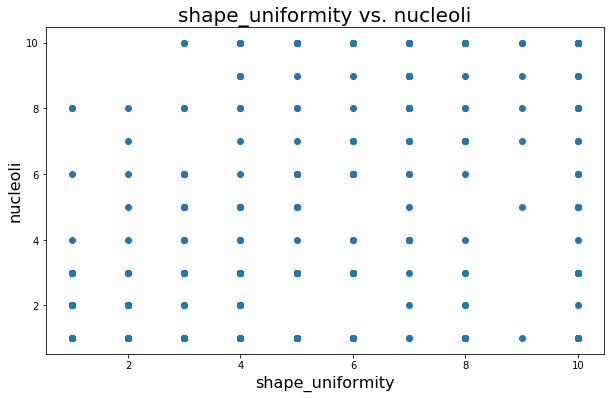

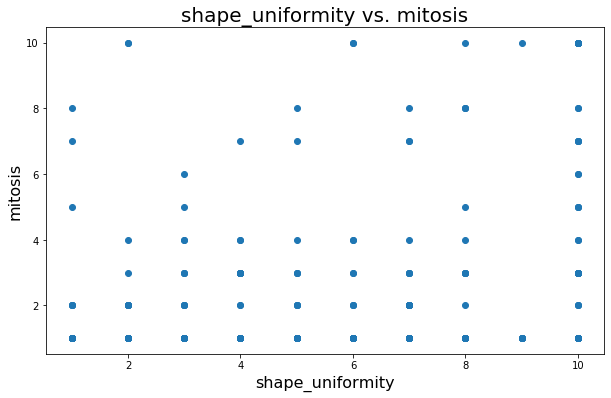

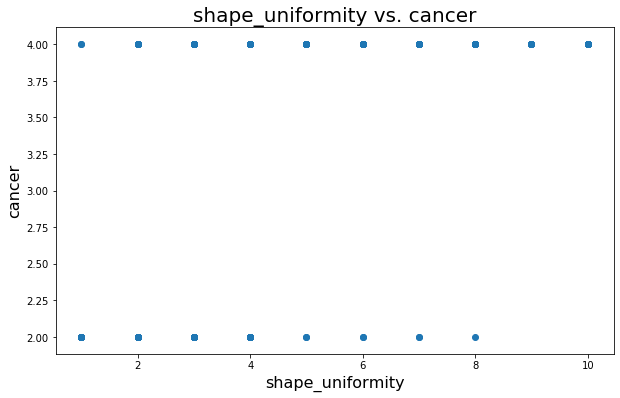

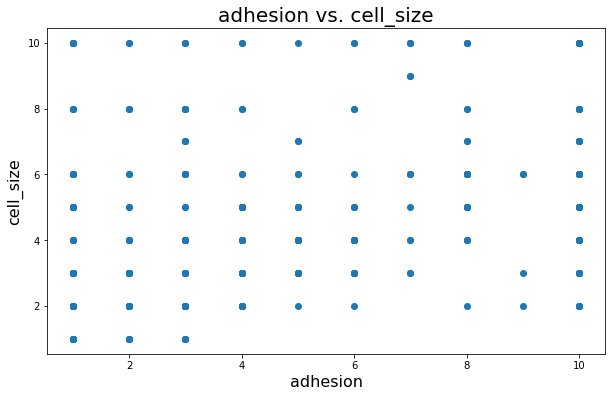

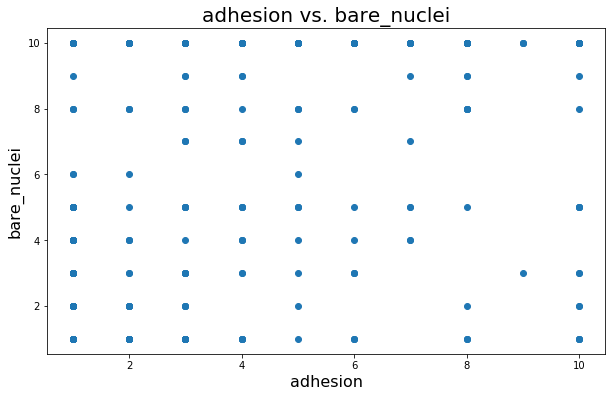

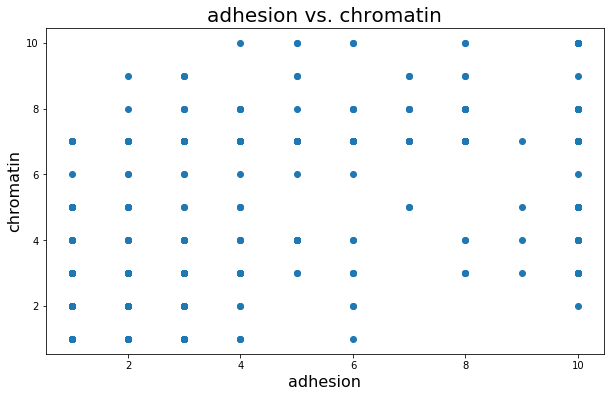

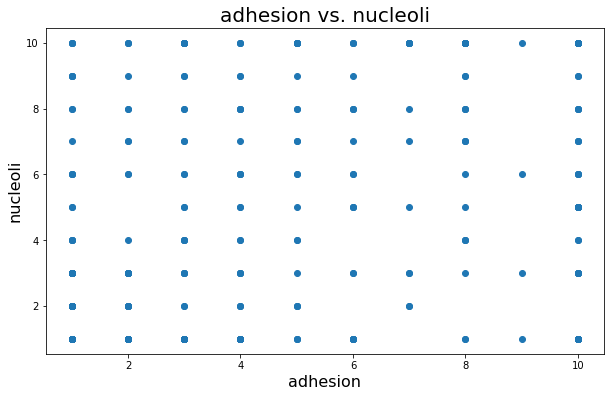

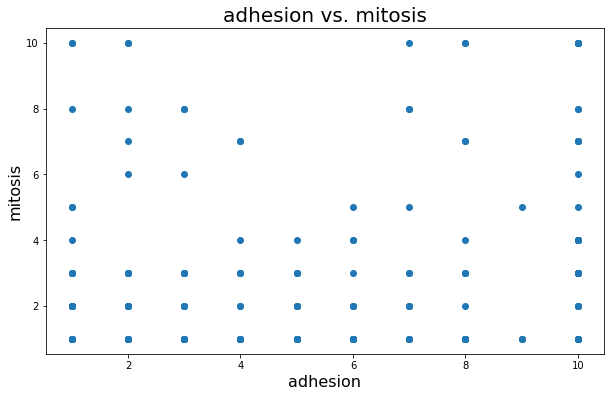

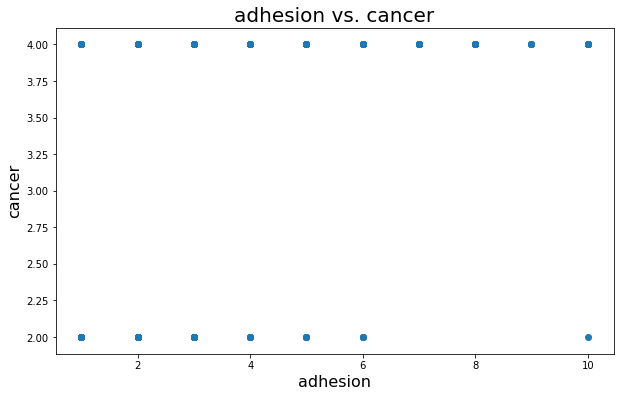

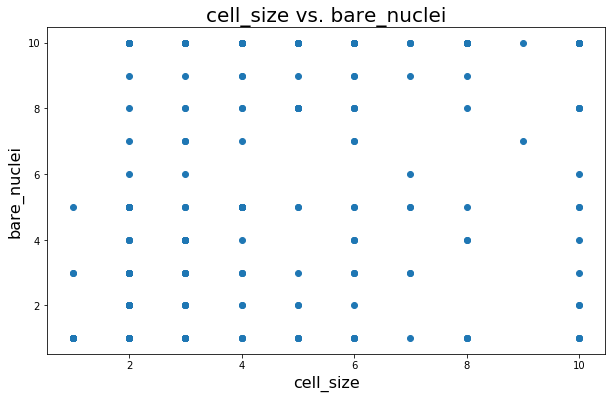

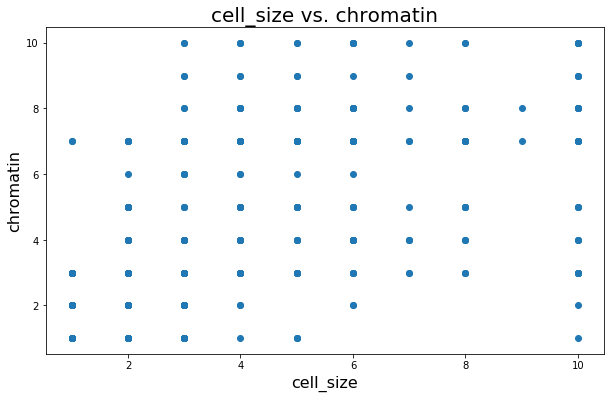

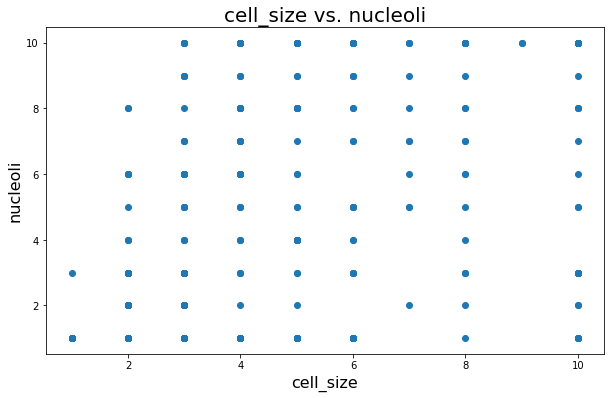

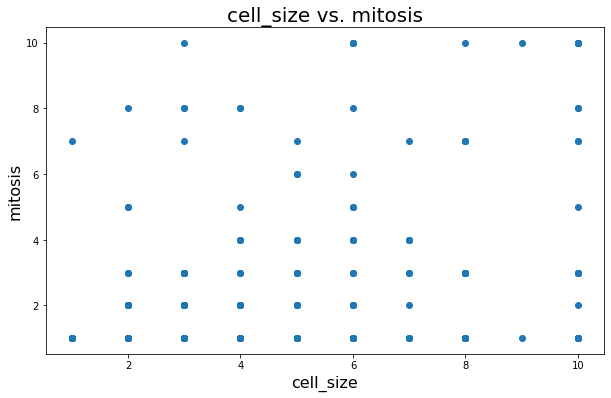

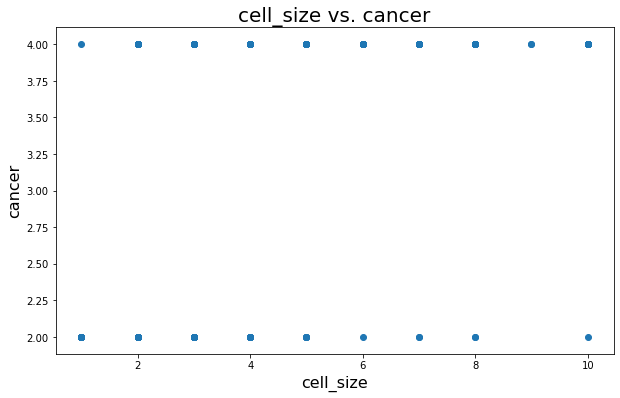

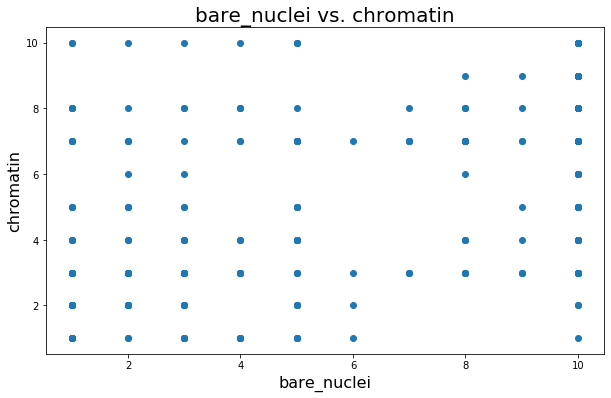

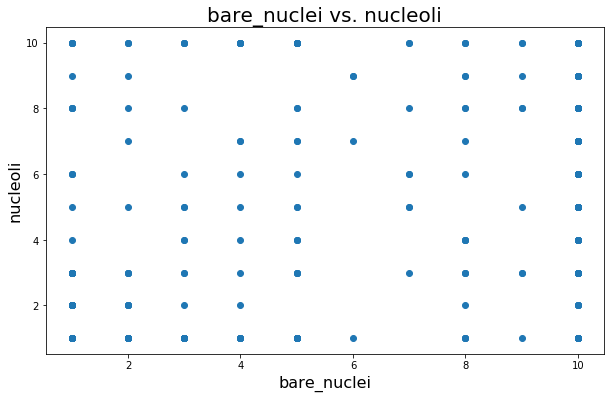

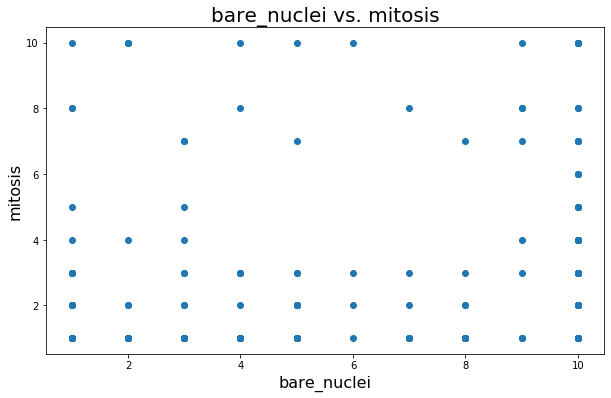

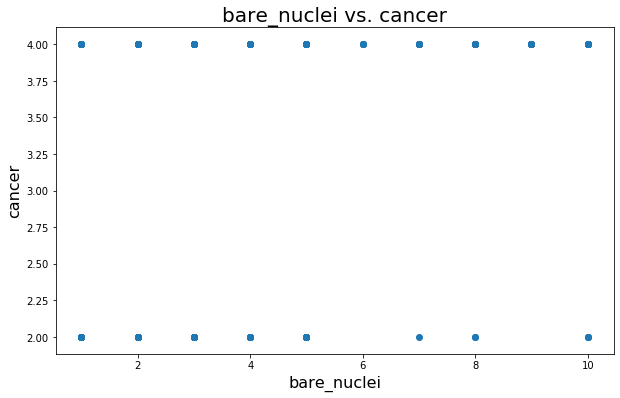

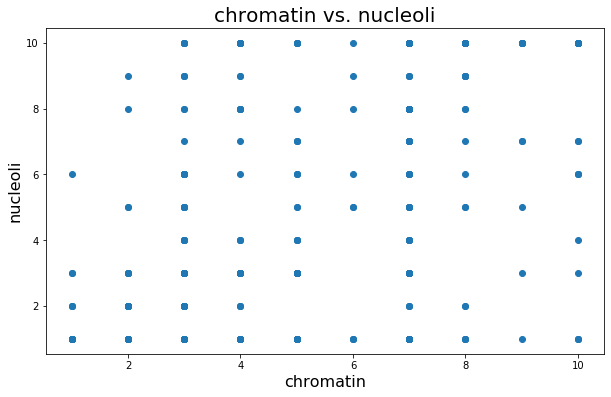

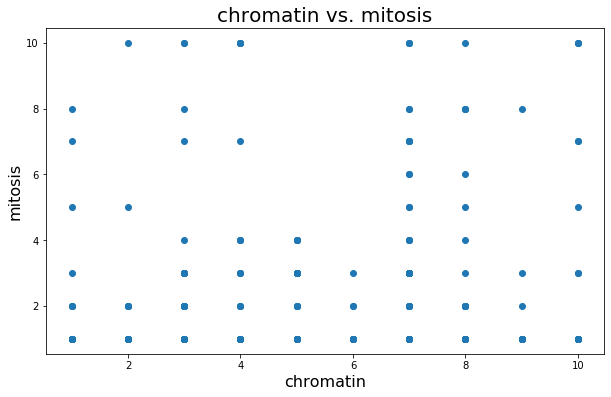

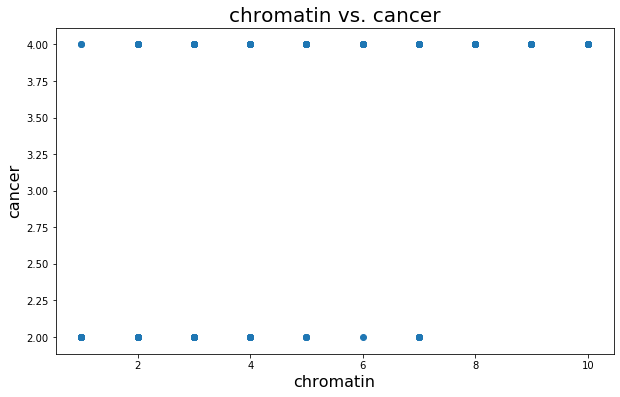

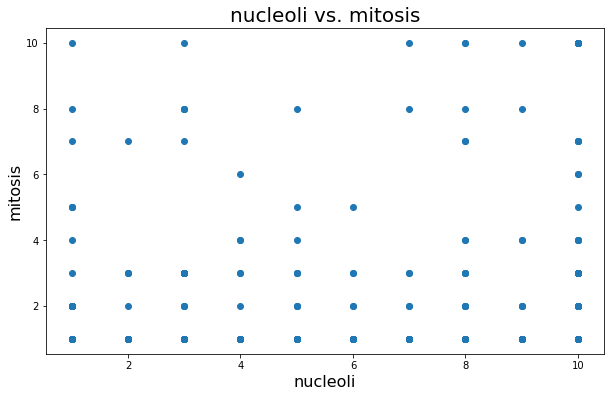

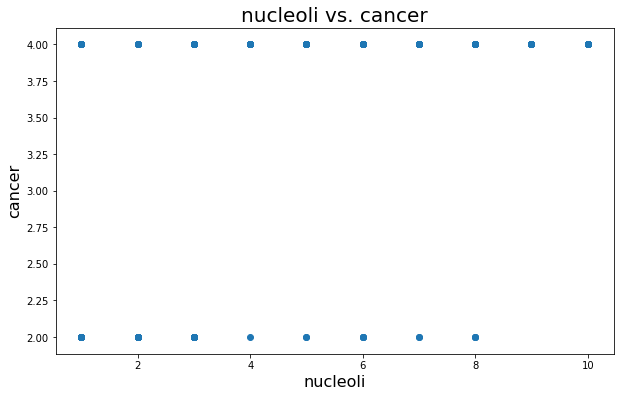

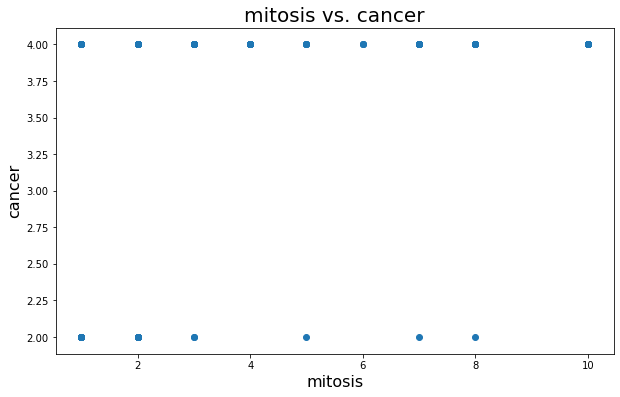

In [37]:
scattered = []
for column in data.columns:
    for other_column in data.columns:
        if column == other_column or column=='cancer':
            pass
        elif column == 'patient_id' or other_column =='patient_id':
            pass
        elif (column, other_column) in scattered or (other_column, column) in scattered:
            pass
        else:
            scattered.append((column, other_column))
            scattered.append((other_column, column))
            plt.title(f"{column} vs. {other_column}", fontsize=20)
            plt.scatter(data[column], data[other_column])
            plt.xlabel(column,fontsize=16)
            plt.ylabel(other_column,fontsize=16)
            plt.gcf().set_size_inches(10,6)
            plt.savefig(f"Visualizations/1/Breast Cancer/scatter_plots/{column} vs. {other_column}.jpg")
            plt.show()

The only one that looked close to having a strong correlation is shape_uniformity vs size_uniformity

# ROC Analysis

In [61]:
def plot_roc_curves(model,model_name,X,Y,independent,title):
    # One Feature at a Time
    Y = Y.reshape(-1)
    for feature in independent:
        X = data[feature].to_numpy().reshape(-1,1)
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
        model = KNN()
        model.fit(X_train,Y_train)
        yprobs = model.predict_proba(X_test)
        plot_roc_curve(model,X_test,Y_test,ax=ax,name=pretty_title(feature))


    # All Features Considered Simultaneously
    X_train, X_test, Y_train, Y_test = train_test_split(data[independent].to_numpy(), Y)
    model = KNN()
    model.fit(X_train,Y_train)
    KNNScores = model.score(X_test,Y_test)
    plot_roc_curve(model,X_test, Y_test, ax=ax,name='Everything')

    # Fig Stuff
    ax.set_title(f"{title} Indicators ROC ({model_name})", fontsize='20')
    ax.set_ylabel("True Positive Rate",fontsize='16')
    ax.set_xlabel("False Positive Rate",fontsize='16')
    ax.plot([0,1],[0,1],lw=3,linestyle='--',color="black")
    fig.set_size_inches(12,12)
    fig.savefig(f'Visualizations/1/Breast Cancer/roc_curves/{title} Indicators ROC ({model_name}).jpg')
#     fig.show()
    
    ConfusionMatrixDisplay(plot_confusion_matrix(model, X_test, Y_test))
#     plt.show()

In [39]:
def pretty_title(feature_name):
    name = feature_name.replace("/","_").replace("_", " ")
    name = name.split()
    words = len(name)
    title = ""
    for j, n in enumerate(name):
        if j == 0:
            title += n[0].upper()+n[1:]
        else:
            title += (" " + n[0].upper()+n[1:])
    return title

In [40]:
independent = ['thickness', 'size_uniformity', 'shape_uniformity', 'adhesion',
               'cell_size', 'bare_nuclei', 'chromatin', 'nucleoli','mitosis'] 

In [41]:
models = [LR,KNN,GNB]
model_names = ["Logistic Regression", "K Nearest Neighbors", "Gaussian Naive Bayes"]

## Logistic Regression, K Nearest Neighbors, Gaussian Naive Bayes

## ROC Plots with Confusion Matrices

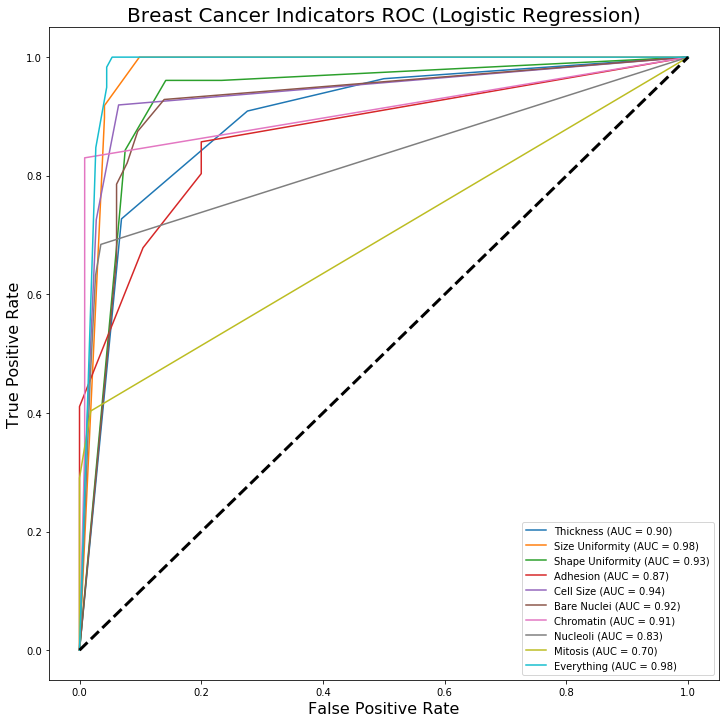

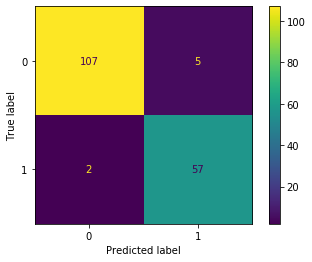

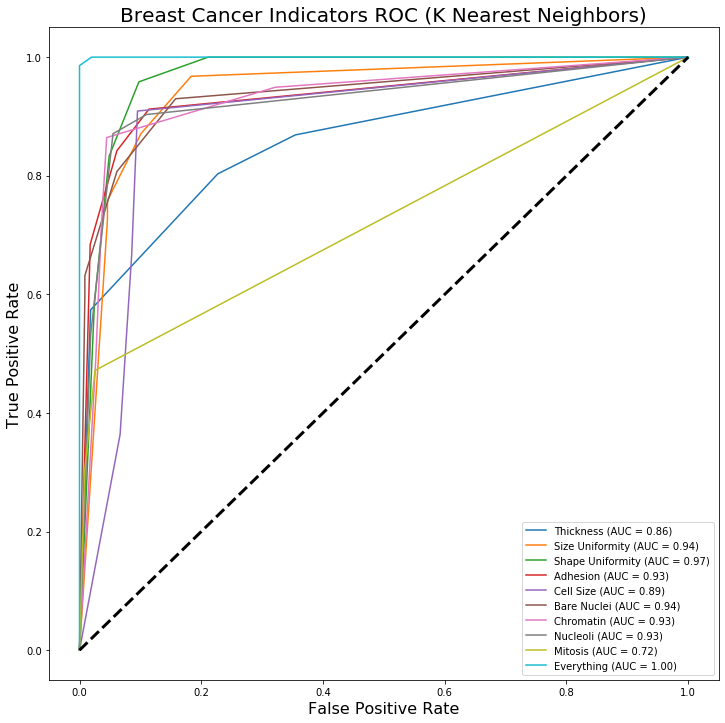

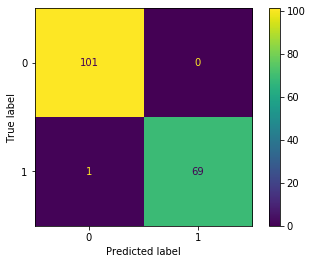

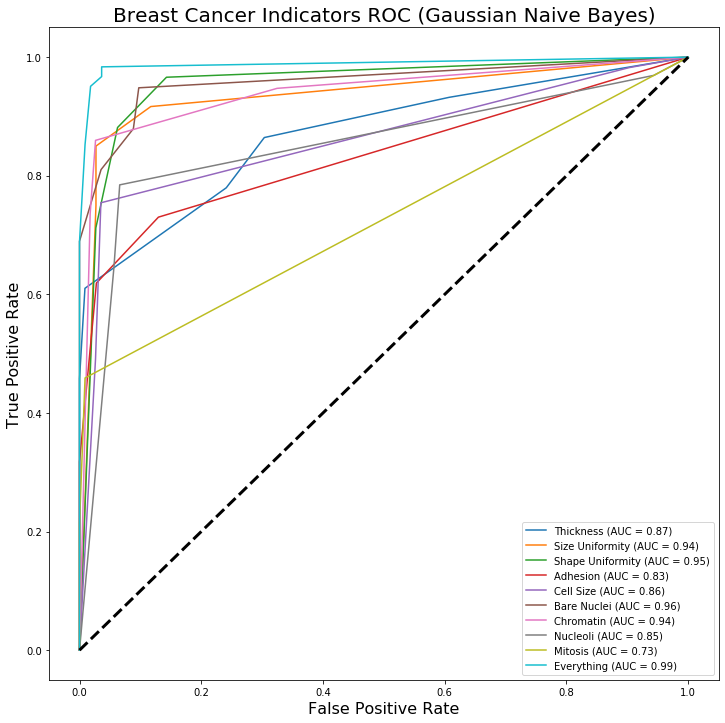

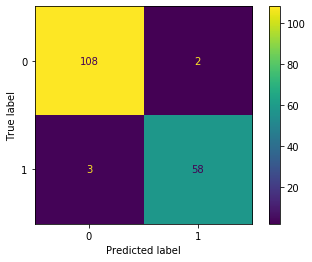

In [62]:
for i, model in enumerate(models):
    fig, ax = plt.subplots()
    plot_roc_curves(model, model_names[i],X,Y,independent,'Breast Cancer')

# Boxplot Analysis

# Need to get hundred sample scores per model to get a nice box plot viz

{'whiskers': [<matplotlib.lines.Line2D at 0x7f6fd4157b00>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6fd4149240>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6fd41577b8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f6fd41498d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f6fd4149c18>],
 'means': []}

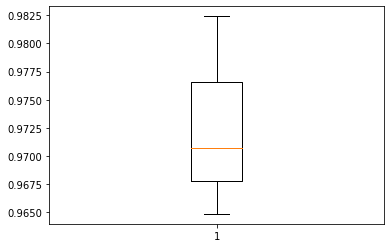

In [12]:
plt.boxplot([LRScores,KNNScores, GNBScores])

# RMS Analysis

In [51]:
def analyze_model_rms(model=None,model_name=None,X=None,Y=None,title='All Features'):

    errors = []
    scores = []
    
    # Data Preparation
    if len(X.shape) == 1:
        X = X.to_numpy().reshape(-1,1)
    else:
        X = X.to_numpy()
    
    # Model Fitting and Predictions
    for _ in range(100):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
        cls = model()
        cls.fit(X_train, Y_train)
        scores.append(cls.score(X_test,Y_test))
        yp = cls.predict(X_test)
        errors.append(mean_squared_error(yp, Y_test))
        
    # Stats
    error = np.array(errors)
    mean = np.mean(errors)
    SD = np.std(errors)
    
    # Plot
    plt.scatter(range(100),errors)
    plt.axhline(mean, c='k',label="Mean Error: {:0.3f}, SD: {:0.3f}".format(mean, SD))
    plt.axhline(mean+2*SD,linestyle='--',c="k")
    plt.axhline(mean-2*SD,linestyle='--',c='k')
    plt.title(f"{title} RMS\n{model_name}", fontsize=20)
    plt.xlabel("Number of Samples", fontsize=16)
    plt.ylabel("Mean Squared Error", fontsize=16)
    plt.grid()
    plt.legend()
    
    plt.gcf().set_size_inches(12,8)
    plt.savefig(f'Visualizations/1/Breast Cancer/rms_analysis/{model_name}/{title} RMS.jpg')
    plt.show()
    
    return scores


## Feature by Feature

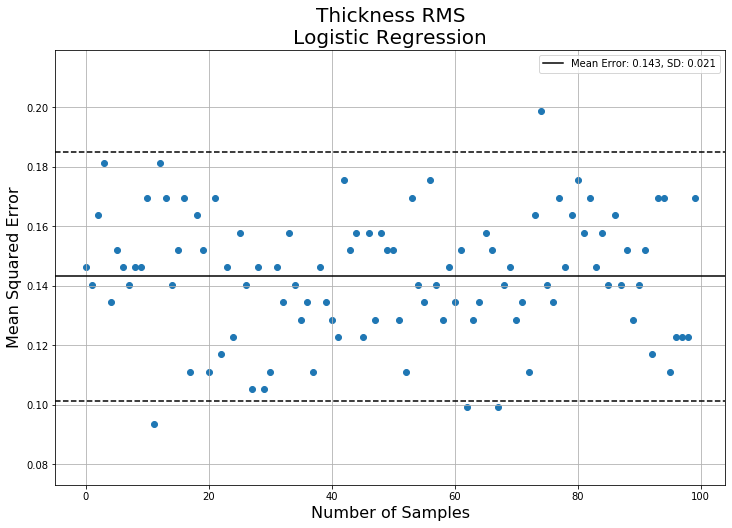

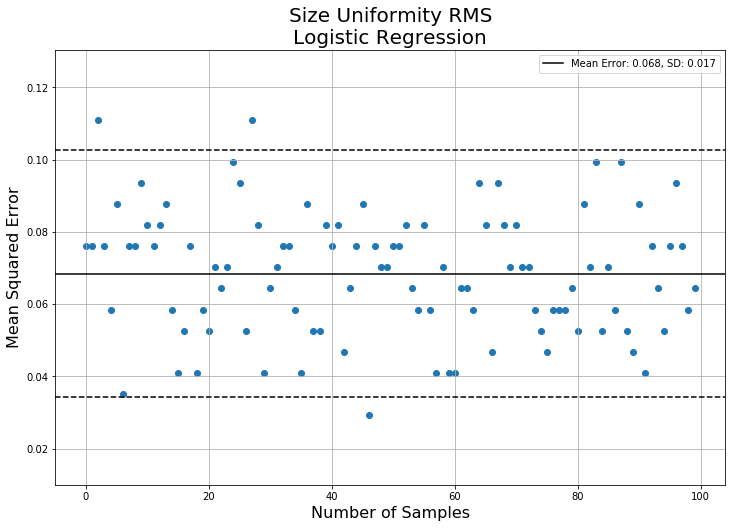

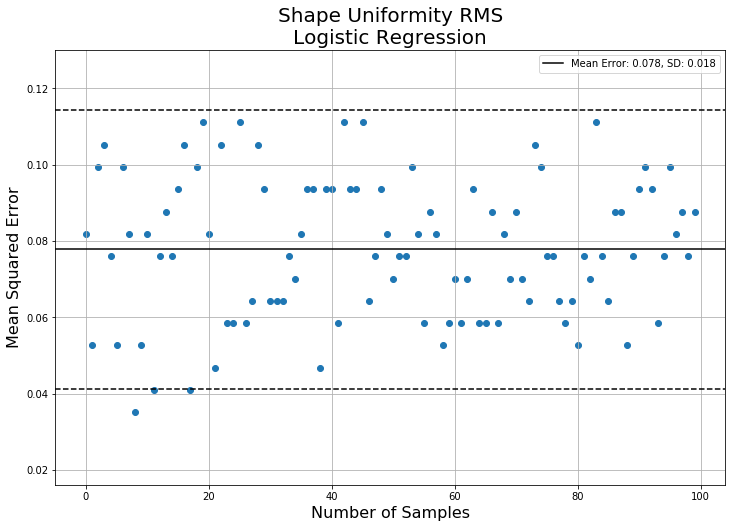

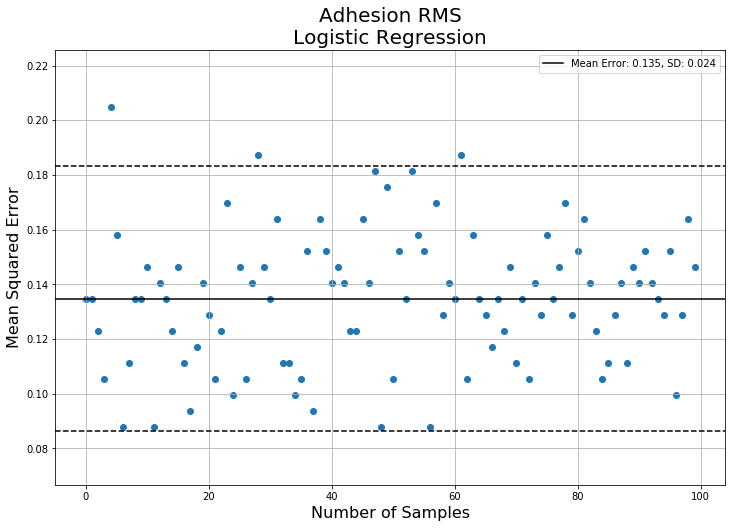

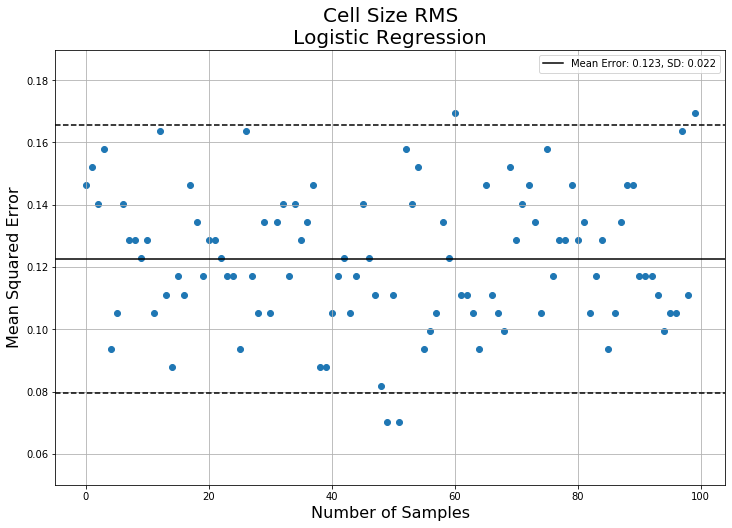

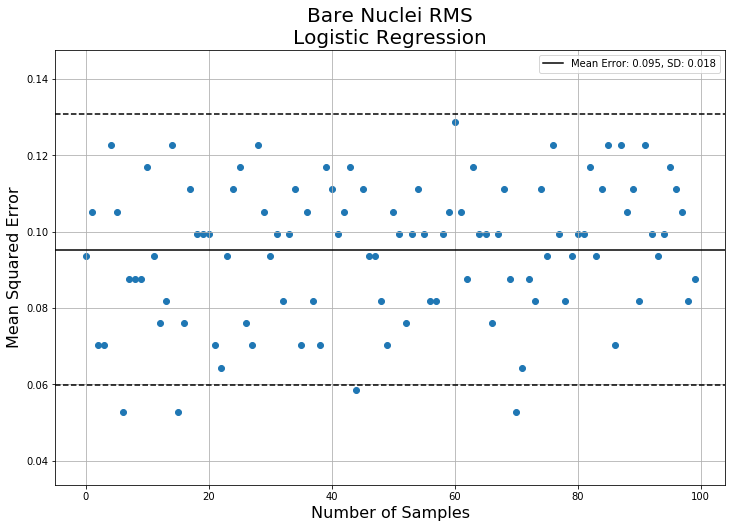

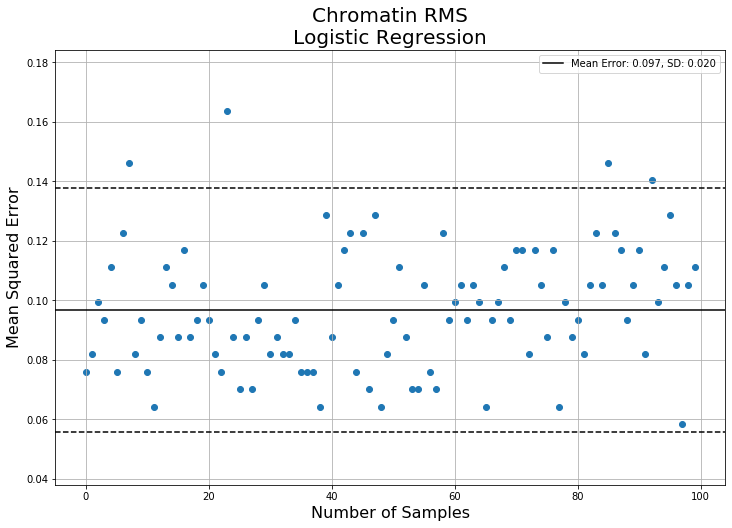

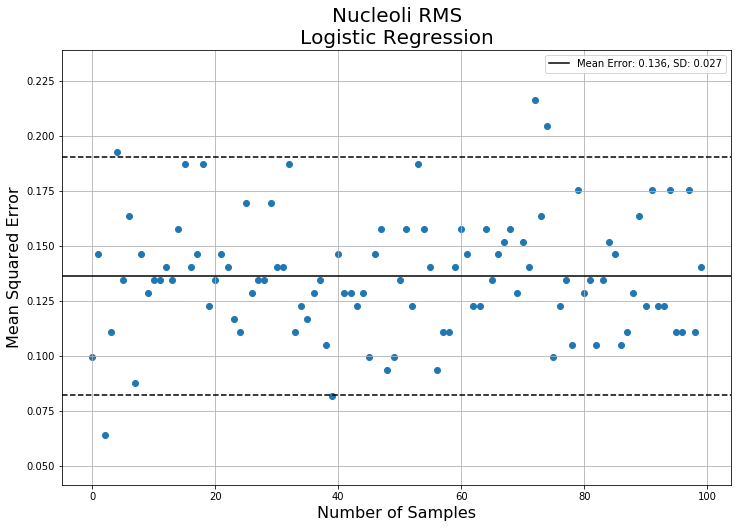

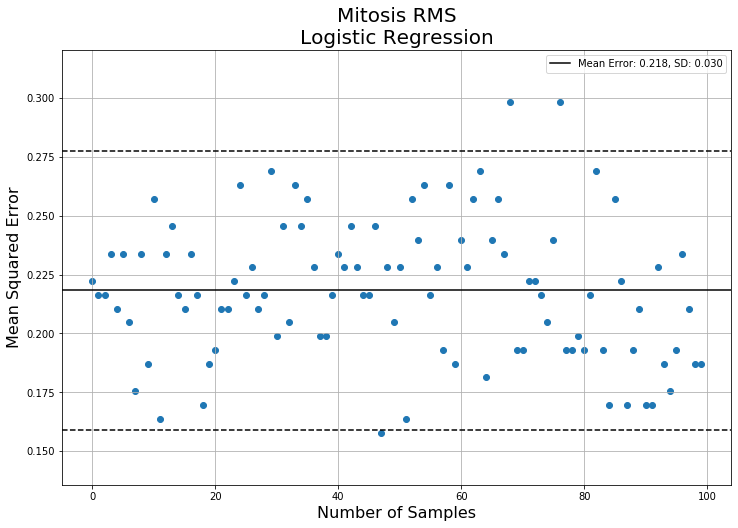

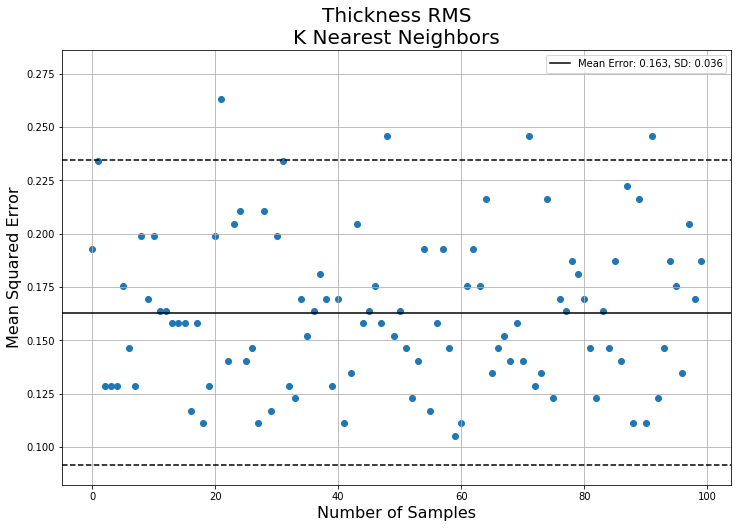

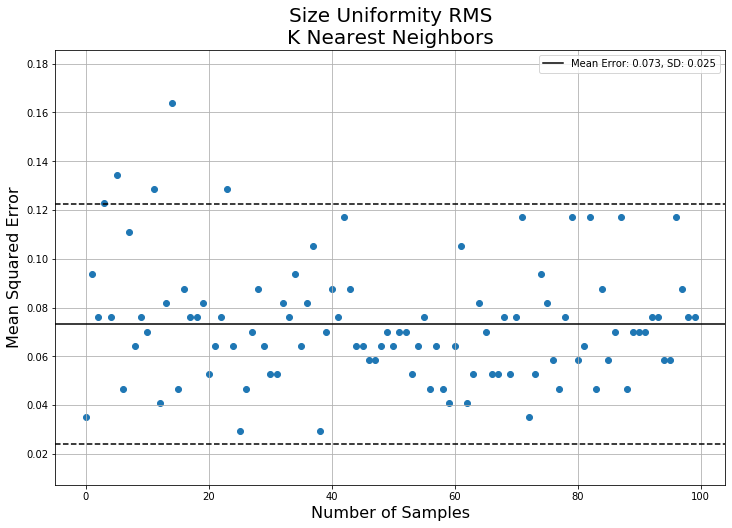

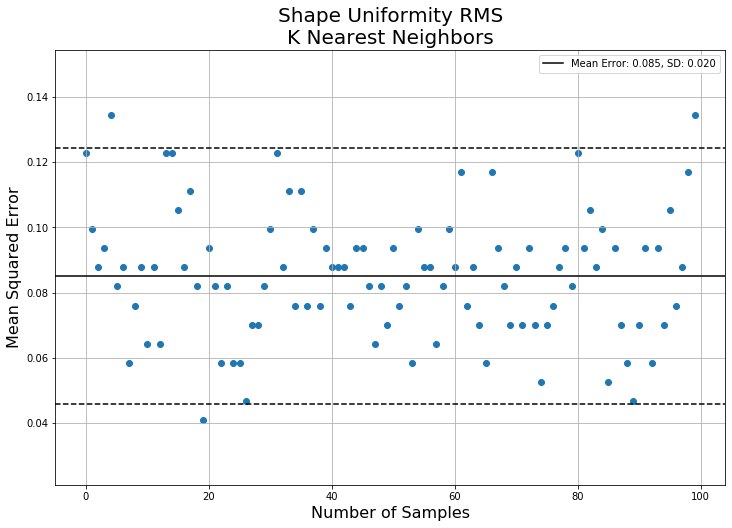

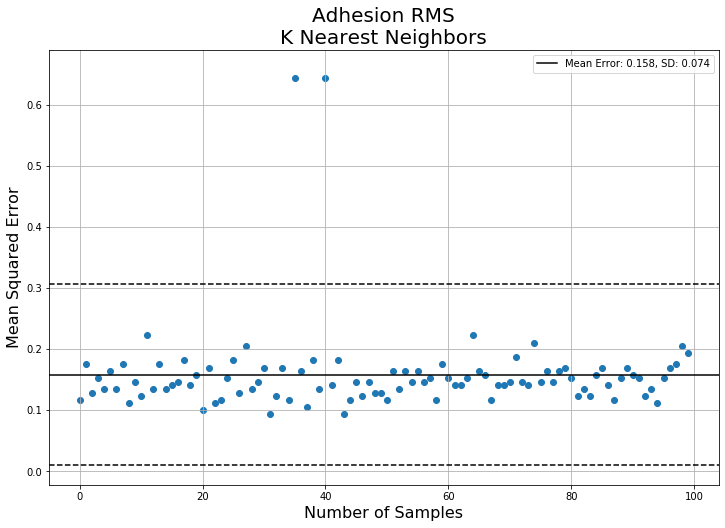

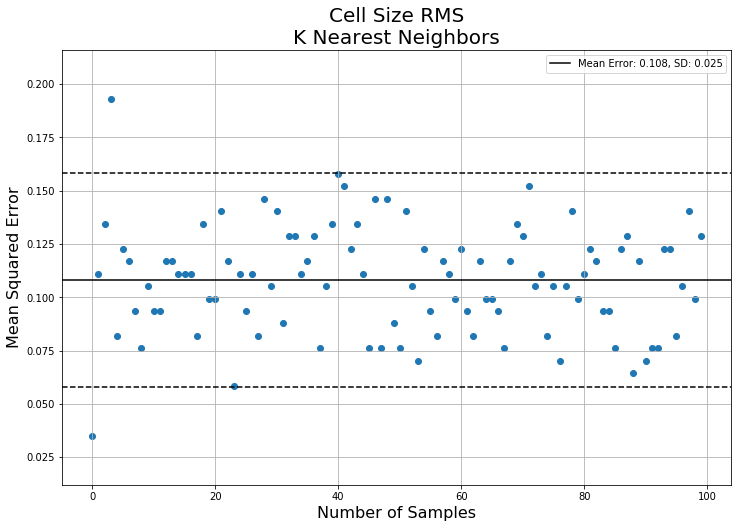

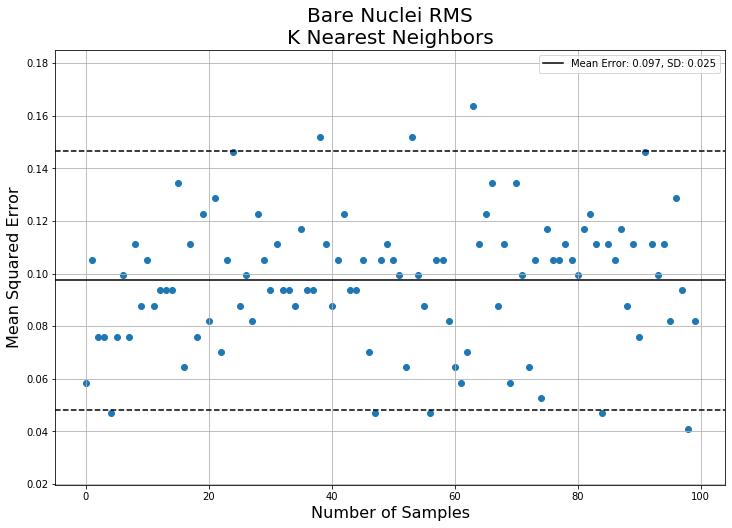

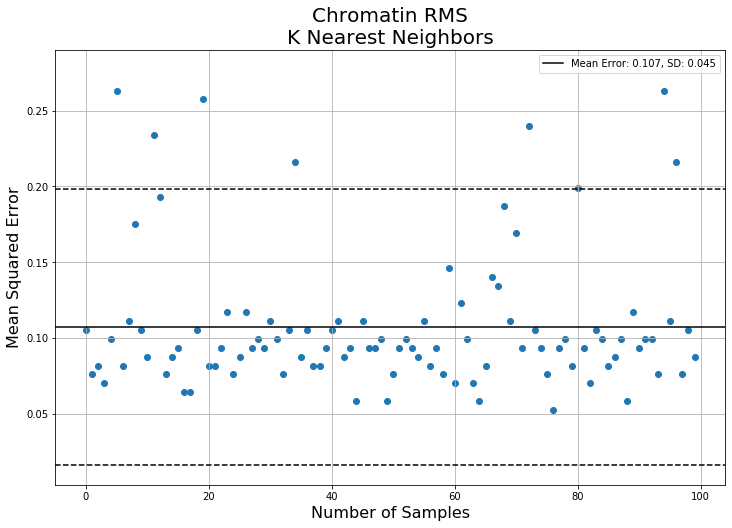

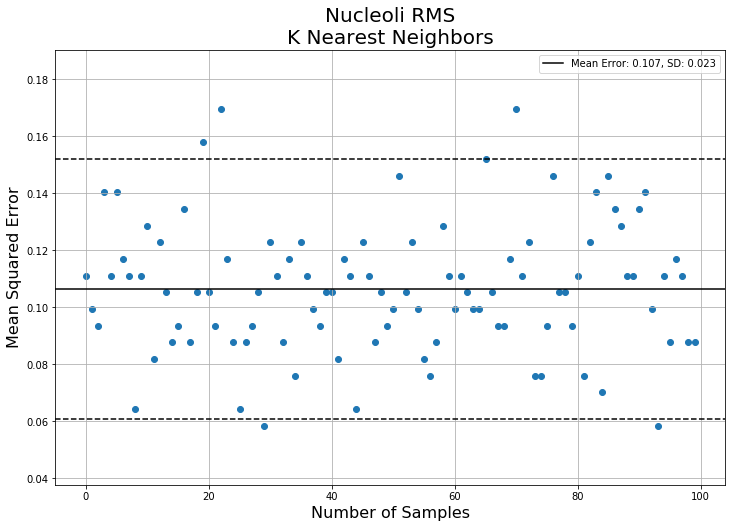

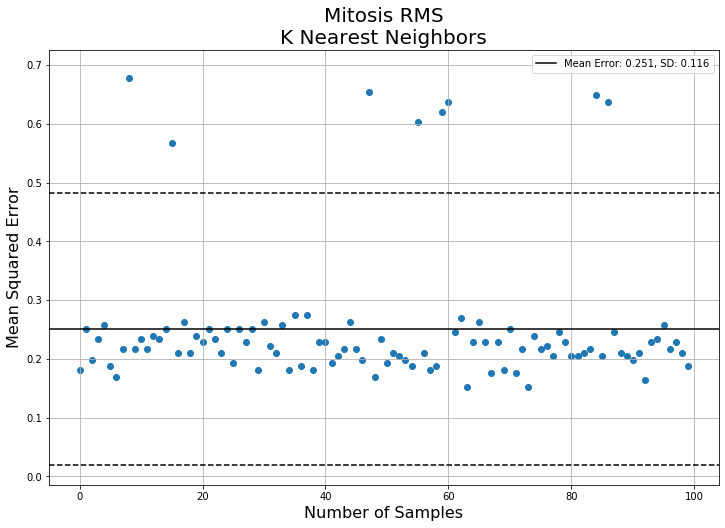

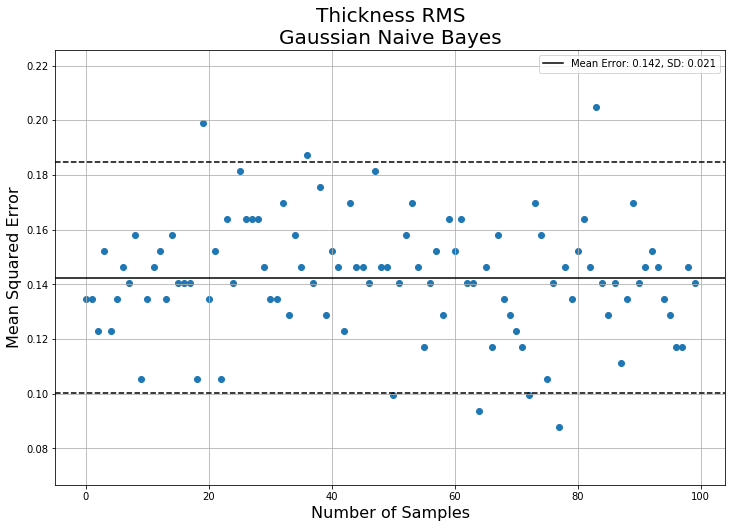

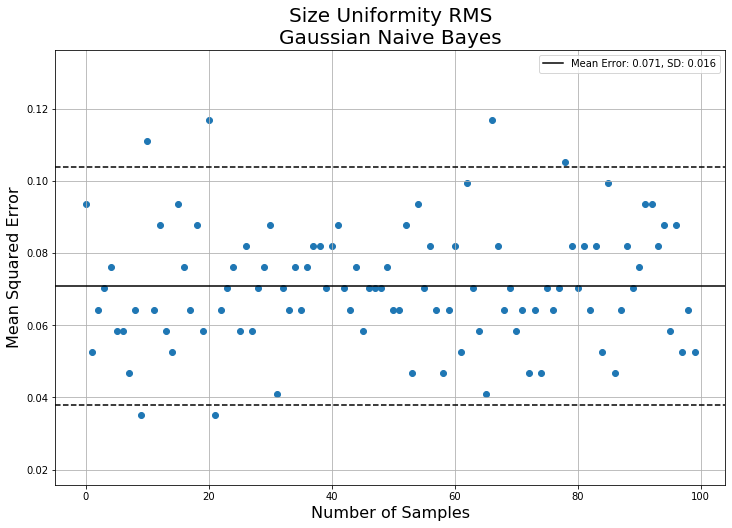

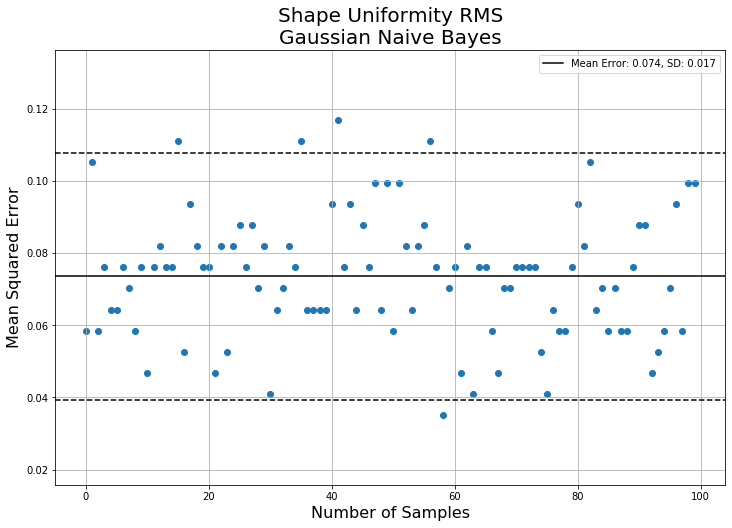

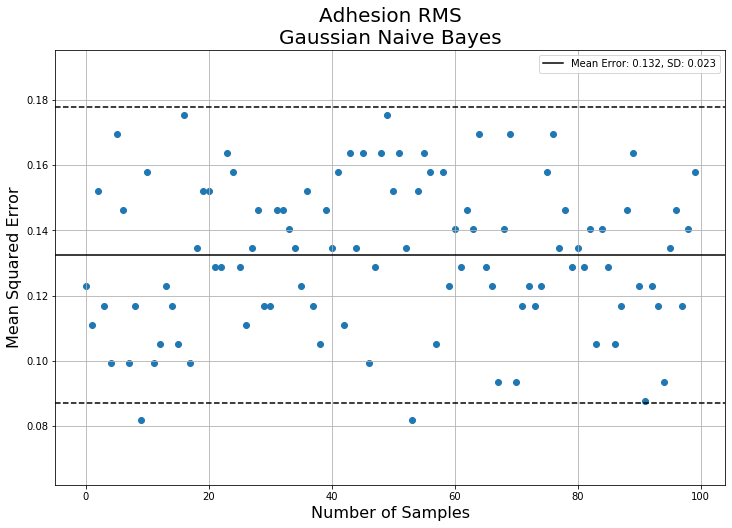

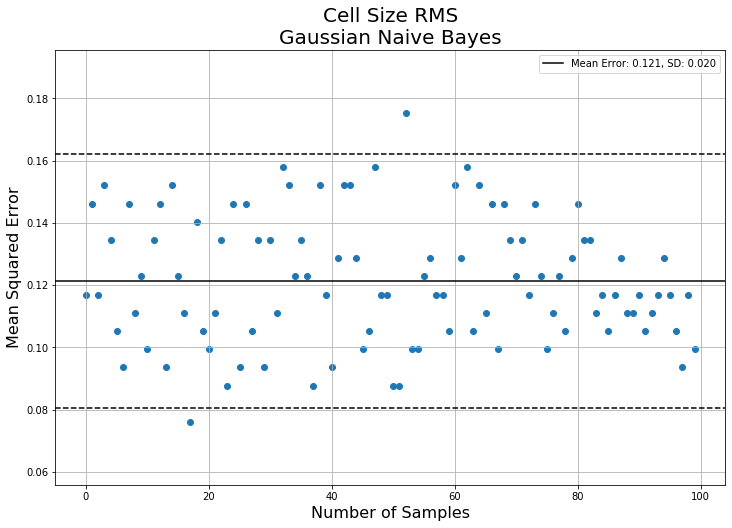

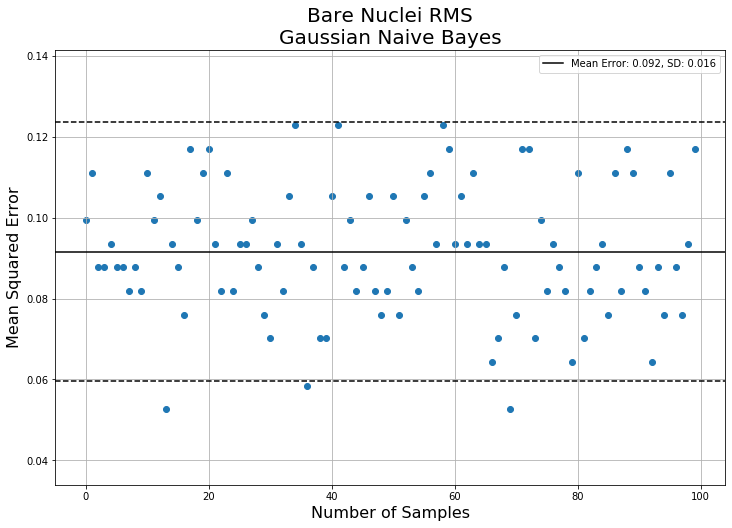

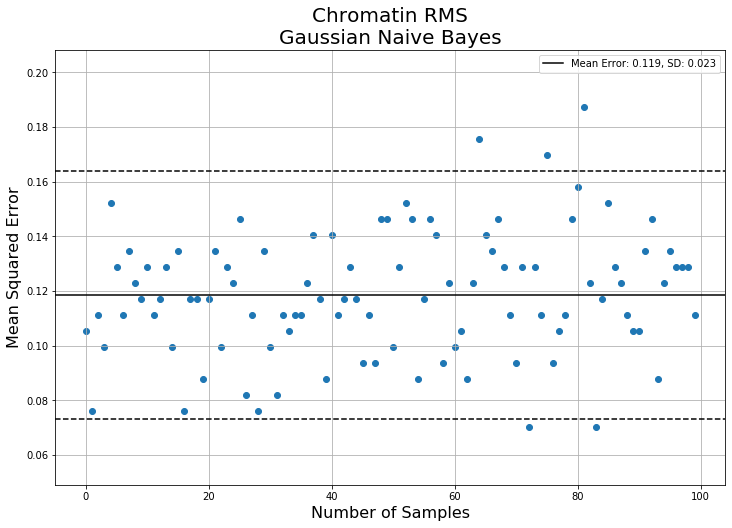

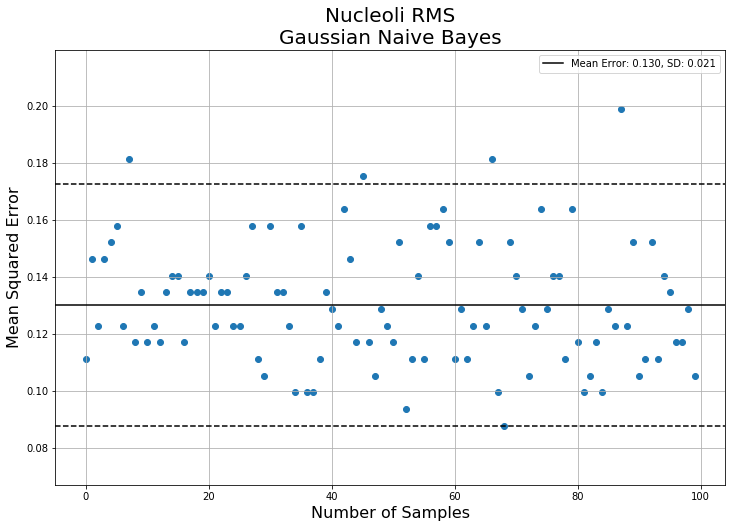

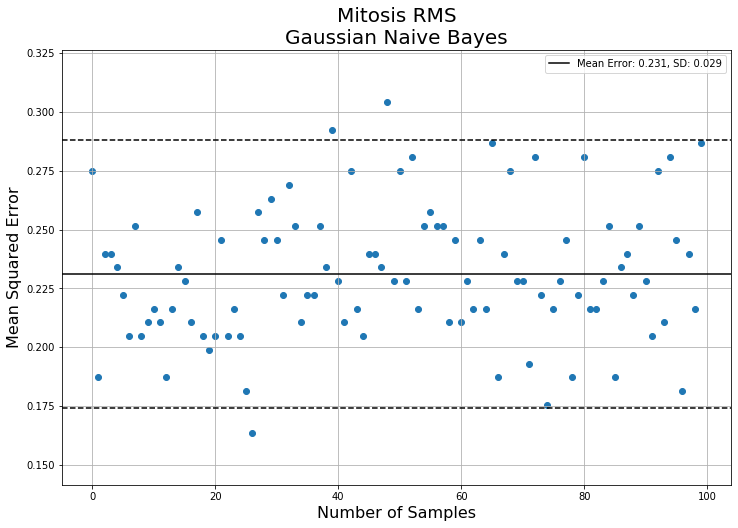

In [123]:
model_scores = dict()
for i, model in enumerate(models):
    model_scores[model_names[i]] = dict()
    for feature in independent:

        if feature in model_scores[model_names[i]]:
            pass
        else:
            model_scores[model_names[i]][feature] = []
            
        title = pretty_title(feature)
        scores = analyze_model_rms(model,model_names[i],data[feature],Y,title)
        model_scores[model_names[i]][feature].append(scores)

In [124]:
print(model_scores)

{'Logistic Regression': {'thickness': [[0.8538011695906432, 0.8596491228070176, 0.8362573099415205, 0.8187134502923976, 0.8654970760233918, 0.847953216374269, 0.8538011695906432, 0.8596491228070176, 0.8538011695906432, 0.8538011695906432, 0.8304093567251462, 0.9064327485380117, 0.8187134502923976, 0.8304093567251462, 0.8596491228070176, 0.847953216374269, 0.8304093567251462, 0.8888888888888888, 0.8362573099415205, 0.847953216374269, 0.8888888888888888, 0.8304093567251462, 0.8830409356725146, 0.8538011695906432, 0.8771929824561403, 0.8421052631578947, 0.8596491228070176, 0.8947368421052632, 0.8538011695906432, 0.8947368421052632, 0.8888888888888888, 0.8538011695906432, 0.8654970760233918, 0.8421052631578947, 0.8596491228070176, 0.8713450292397661, 0.8654970760233918, 0.8888888888888888, 0.8538011695906432, 0.8654970760233918, 0.8713450292397661, 0.8771929824561403, 0.8245614035087719, 0.847953216374269, 0.8421052631578947, 0.8771929824561403, 0.8421052631578947, 0.8713450292397661, 0.84

In [128]:
scores = []
for model_name in model_names:
    for feature in independent:
        scores.append(model_scores[model_name][feature][0])

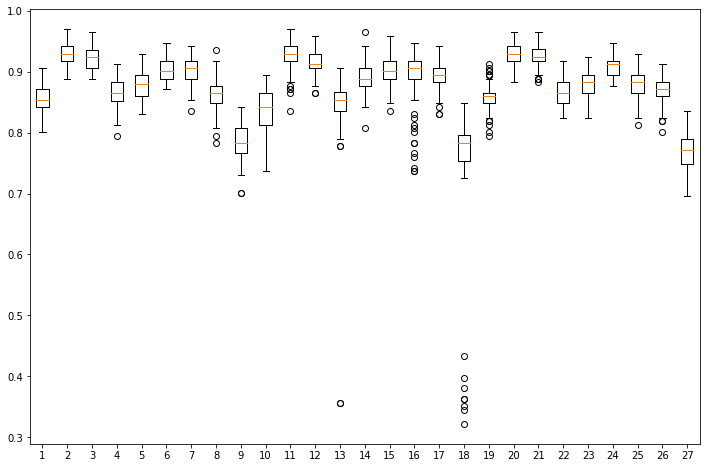

In [132]:
plt.boxplot(scores);
plt.gcf().set_size_inches(12,8)

In [133]:
scores = []
for feature in independent:
    for model_name in model_names:
        scores.append(model_scores[model_name][feature][0])

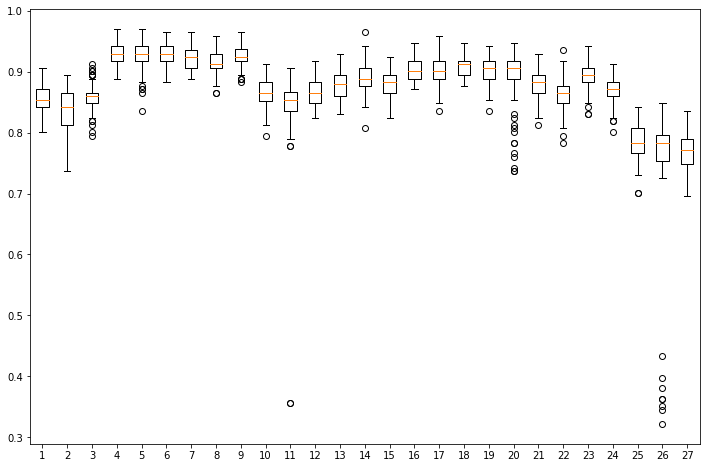

In [134]:
plt.boxplot(scores)
plt.gcf().set_size_inches(12,8)

## All Features

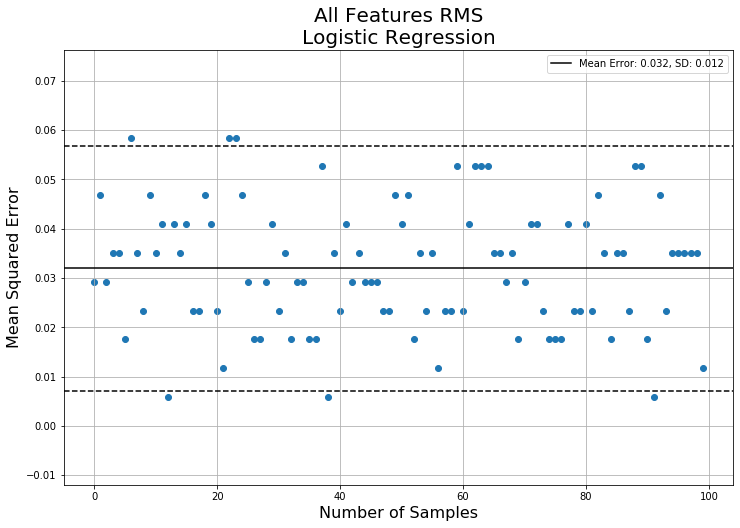

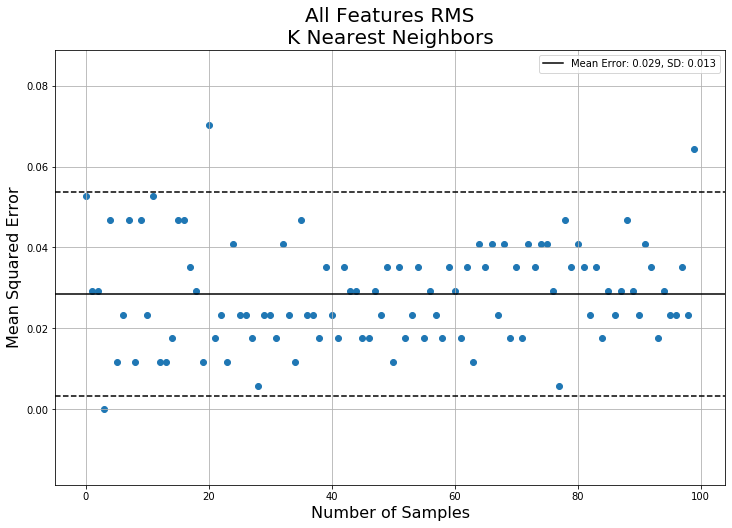

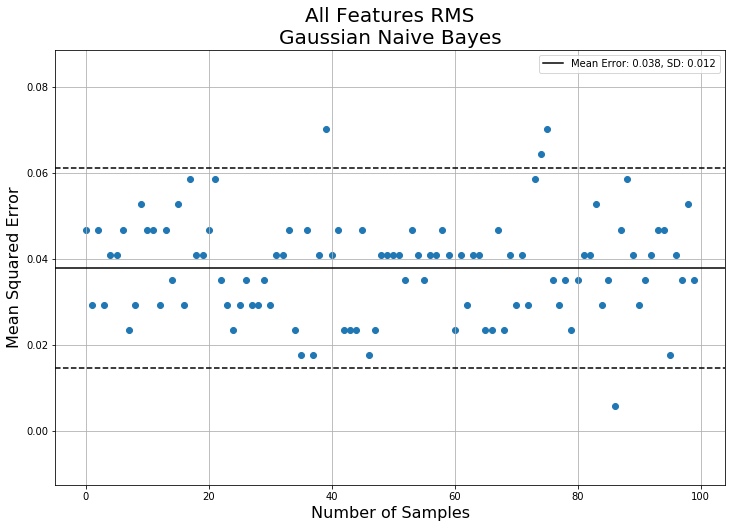

In [63]:
model_scores = dict()
for i, model in enumerate(models):
    model_scores[model_names[i]] = dict()
    scores = analyze_model_rms(model,model_names[i],data[independent],Y)
    model_scores[model_names[i]].append(scores)

# Model Scores Boxplots

Using the 100 Train Test Splits of each model to create a boxplot comparison.

In [82]:
keys,values = zip(*model_scores.items())

In [88]:
scores = list(values)

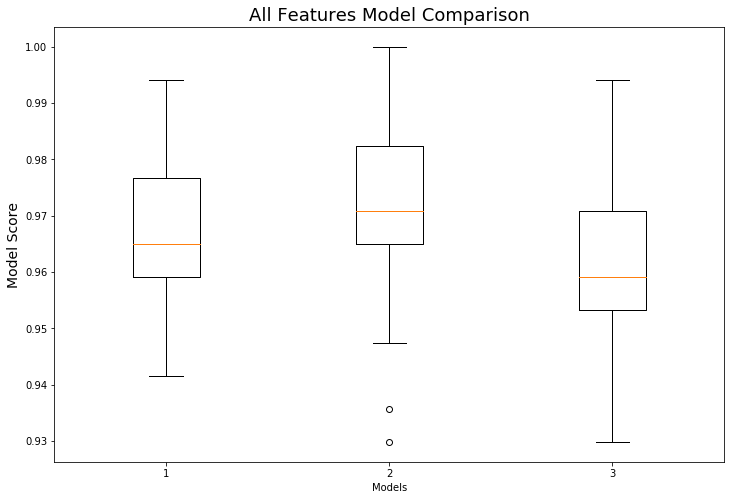

In [116]:
plt.boxplot([scores[0][0],scores[1][0],scores[2][0]]);
plt.title("All Features Model Comparison", fontsize=18);
plt.ylabel('Model Score', fontsize=14)
plt.xlabel('Models')
# plt.xticks(["Logistic Regression","K Nearest Neighbors",'Gaussian Naive Bayes'])
plt.gcf().set_size_inches(12,8)

# Conclusion